In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs
import datetime
%matplotlib inline

# Importing data and Handling missing values

In [2]:
df = pd.read_csv("Lead_Verify_Response_Modified.csv")
print df.describe()
print df.info()

              ORDER   Mailing Zip  Call Disposition
count   9998.000000   9998.000000       9998.000000
mean    5000.821964  50467.017904          3.331866
std     2887.075954  29246.525441          2.022749
min        1.000000   1001.000000          1.000000
25%     2500.250000  27407.500000          2.000000
50%     5001.500000  48172.000000          2.000000
75%     7500.750000  77006.000000          6.000000
max    10000.000000  99901.000000          6.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 19 columns):
ORDER                    9998 non-null int64
First Name               9998 non-null object
Last Name                9998 non-null object
Mailing Street           9998 non-null object
Mailing City             9998 non-null object
Mailing State            9998 non-null object
Mailing Zip              9998 non-null int64
Phone                    9998 non-null object
Phone to Name            9998 non-null object
Phone Is Vali

In [52]:
grp_phontype = df.groupby(['Address Is Commercial'])['ORDER'].count()
print grp_phontype

Address Is Commercial
FALSE                1669
Not Valid Address     132
Not in Database       173
TRUE                 7966
Unknow                 58
Name: ORDER, dtype: int64


In [76]:
grp_phontype = df.groupby(['Phone Line Type','Phone Is Commercial'])['ORDER'].count()
print grp_phontype


Phone Line Type  Phone Is Commercial
Fixed VOIP       FALSE                   343
                 TRUE                   2679
Landline         FALSE                   716
                 TRUE                   3516
Mobile           FALSE                   374
                 TRUE                    124
No Type          No Phone                 35
Non-fixed VOIP   FALSE                   150
                 TRUE                   2020
Tollfree         TRUE                     41
Name: ORDER, dtype: int64


In [53]:
grp_phontype = df.groupby(['Address Type','Address Is Commercial','Address Is Active'])['ORDER'].count()
print grp_phontype
#sns.countplot(x=)

Address Type          Address Is Commercial  Address Is Active
Commercial mail drop  TRUE                   TRUE                   70
Multi unit            FALSE                  FALSE                   7
                                             TRUE                  144
                      TRUE                   FALSE                  60
                                             TRUE                 3566
Not Valid Address     Not Valid Address      Not Valid Address     132
Not in Database       Not in Database        Not in Database       173
PO box                FALSE                  FALSE                  14
                                             TRUE                  432
                      TRUE                   FALSE                   1
                                             TRUE                   41
PO box throwback      FALSE                  FALSE                   1
                                             TRUE                    1
              

##### Upon importing data file I found there are many columns having missing values.
##### Phone to Name: I have added value as not valid for records where there in Phone is Valid columns have False value.
##### Phone Is valid: Has most of the entries as Valid = True so imported True value for all missing values
##### Phone Line Type: I have added value as not valid for records where there in Phone is Valid columns have False value.
##### Phone Is Prepaid: This column has most of the missing values. So created another category to replace Nan i.e Unknown type and for invalid phone added no phone category.  
##### Phone Is Commercial: After doing some data exploration I have imported values to this column by looking for values in Phone Line type column so Filling in NaN's for variables with high coverage. For example all phone line type Landline are commercial so I will True for Phone is Commercial.
##### Similarly I have imputed values for address field.


# Data Exploration

##### Below we see we CA has most 1 as Call Disposition

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

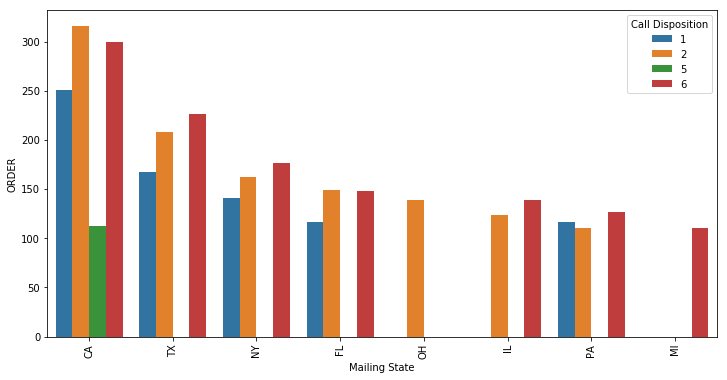

In [74]:
plt.figure(figsize=(12, 6))
groupstate = df.groupby(["Mailing State",'Call Disposition'],sort=True)['ORDER'].count().reset_index()

sns.barplot(x='Mailing State',y='ORDER',data=groupstate.sort_values('ORDER',ascending=False).head(20),hue='Call Disposition')
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

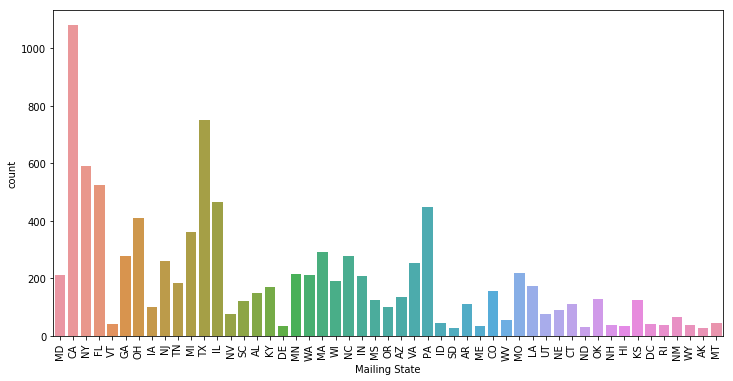

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Mailing State', data = df)
plt.xticks(rotation='vertical')

##### Instead of using entire zip code I thought of using just first three digit of zip code get just the nearby area

In [51]:
df['New Zip'] = map(lambda x : str(x)[:3],df['Mailing Zip'])
df.head(1)

,ORDER,First Name,Last Name,Mailing Street,Mailing City,Mailing State,Mailing Zip,Phone,Phone to Name,Phone Is Valid,Phone Line Type,Phone Is Prepaid,Phone Is Commercial,Address to Name,Address Is Valid,Address Type,Address Is Active,Address Is Commercial,Call Disposition,New Zip
0,1,Donald,Mathews,789 Cambridge Place,Hanover,MD,21076,860-452-9151,No match,True,Landline,FALSE,TRUE,No match,True,Multi unit,TRUE,TRUE,5,210


###### After running model using feature 'Mailing City','Mailing State', 'Zip Code' it was not showing much of improvement in model but was increasing diamentions which was casuing increase in model traning time. So I have dropped those columns.

In [107]:
new_df = df.drop(['First Name','Last Name','Mailing Street','Mailing Zip','Phone','Mailing City','Mailing State','Call Disposition','New Zip'],axis=1)
target = df['Call Disposition']

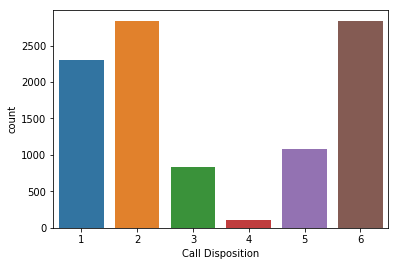

In [16]:
sns.countplot(x='Call Disposition',data=df)

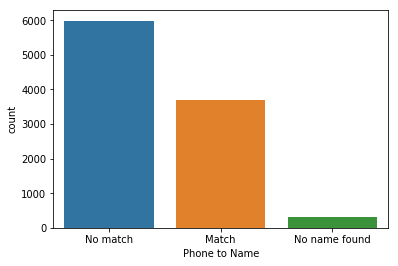

In [18]:
sns.countplot('Phone to Name',data=df)

In [108]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 11 columns):
ORDER                    9998 non-null int64
Phone to Name            9998 non-null object
Phone Is Valid           9998 non-null bool
Phone Line Type          9998 non-null object
Phone Is Prepaid         9998 non-null object
Phone Is Commercial      9998 non-null object
Address to Name          9998 non-null object
Address Is Valid         9998 non-null bool
Address Type             9998 non-null object
Address Is Active        9998 non-null object
Address Is Commercial    9998 non-null object
dtypes: bool(2), int64(1), object(8)
memory usage: 722.6+ KB


##### Most of the data in this dataset is categorical data. So here I am using one-hot encoding to get dummy values for all the categoriacal columns. As there are not any ordinal catergorical feature get_dummies should sufficient for handling all the features

In [109]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
cat_col = [ 'Mailing State','Phone to Name','Phone Is Valid', 'Phone Line Type', 
                                   'Phone Is Prepaid','Phone Is Commercial', 'Address to Name', 'Address Is Valid','Address Type', 
                               'Address Is Active', 'Address Is Commercial']
#for col in cat_col:
#    new_df[col] = pd.get_dummies(new_df[col])
new_df = pd.get_dummies(new_df)
new_df[['Phone Is Valid','Address Is Valid']] = new_df[['Phone Is Valid','Address Is Valid']].astype(int)
new_df = new_df.drop(['ORDER'],axis=1)
new_df.head()

,Phone Is Valid,Address Is Valid,Phone to Name_Match,Phone to Name_No match,Phone to Name_No name found,Phone to Name_Not Valid,Phone Line Type_Fixed VOIP,Phone Line Type_Landline,Phone Line Type_Mobile,Phone Line Type_No Type,...,Address Is Active_FALSE,Address Is Active_Not Valid Address,Address Is Active_Not in Database,Address Is Active_TRUE,Address Is Active_Unknown,Address Is Commercial_FALSE,Address Is Commercial_Not Valid Address,Address Is Commercial_Not in Database,Address Is Commercial_TRUE,Address Is Commercial_Unknow
0,1,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
print new_df.columns

Index([u'Phone Is Valid', u'Address Is Valid', u'Phone to Name_Match',
       u'Phone to Name_No match', u'Phone to Name_No name found',
       u'Phone to Name_Not Valid', u'Phone Line Type_Fixed VOIP',
       u'Phone Line Type_Landline', u'Phone Line Type_Mobile',
       u'Phone Line Type_No Type', u'Phone Line Type_Non-fixed VOIP',
       u'Phone Line Type_Tollfree', u'Phone Is Prepaid_FALSE',
       u'Phone Is Prepaid_No Phone', u'Phone Is Prepaid_TRUE',
       u'Phone Is Prepaid_Unknown', u'Phone Is Commercial_FALSE',
       u'Phone Is Commercial_No Phone', u'Phone Is Commercial_TRUE',
       u'Address to Name_Match', u'Address to Name_No match',
       u'Address to Name_No name found', u'Address to Name_Not Valid Address',
       u'Address to Name_Not in Database',
       u'Address Type_Commercial mail drop', u'Address Type_Multi unit',
       u'Address Type_Not Valid Address', u'Address Type_Not in Database',
       u'Address Type_PO box', u'Address Type_PO box throwback',
      

##### I tried using multiclass model using all deposition classes. But as we need to concentrate only on call deposition category 1 I converted multiclass problem into binary classification problem and labled all other depositions as 0. 

In [110]:
target = target.map({1:1, 2:0, 3:0, 4:0, 5:0, 6:0})
target.count()

9998

In [111]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 7998 samples.
Testing set has 2000 samples.


### Naive predictor considering model predicated call deposition as 1 for all the data point.

In [112]:
TP = np.sum(target) # Counting the ones as this is the naive case. 

FP = target.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
print TP,FP
# TODO: Calculate accuracy, precision and recall

accuracy = float(TP)/float(target.count())
recall = 1
precision = accuracy
beta= 0.5


# The formula for fbeta score can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
fscore = (1 + 0.25) * (precision * recall) / ((0.25 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

2306 7692
Naive Predictor: [Accuracy score: 0.2306, F-score: 0.2726]


##### Building a train predictor to compare multiple models
### Here metrics that I am going to use to compare different models is F1 score, accuracy 

In [124]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, precision_recall_curve,confusion_matrix
from sklearn import cross_validation, metrics
import time
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 

    results = {}
    
  
    start = time.time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time()
    
    results['train_time'] = end - start
    
    start = time.time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time.time()
    
    results['pred_time'] = end - start
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f_train'] = fbeta_score(y_train, predictions_train, 0.5,average='weighted')
        
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5,average='weighted')
    matrix =  confusion_matrix(y_test, predictions_test)
    TP =  matrix[0][0]
    FP = matrix[0][1]  # Specific to the naive case

    TN = matrix[1][1] # No predicted negatives in the naive case
    FN = matrix[1][0] # No predicted negatives in the naive case

    # TODO: Calculate accuracy, precision and recall
    accuracy = metrics.accuracy_score(y_test, predictions_test)
    recall = float(TP )/  float(TP + FN)
    precision = float(TP )/ float(TP + FP)
    print "precision: {}, recall: {}".format(recall, precision) 
    beta = 0.5
    
    # TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
    # HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
    fscore = (1 + 0.25) * (precision * recall) / ((0.25 * precision) + recall)
    print "Test fscore with beta 0.5 : ", fscore   
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    dataframe = pd.DataFrame(predictions_train,y_train)  
    dataframe.to_csv(learner.__class__.__name__+".txt")
    # Return the results
    return results

precision: 0.810554803789, recall: 0.765984654731
Test fscore with beta 0.5 :  0.774502198086
LogisticRegressionCV trained on 79 samples.
precision: 0.832642916321, recall: 0.642583120205
Test fscore with beta 0.5 :  0.673321720488
LogisticRegressionCV trained on 799 samples.
precision: 0.865142857143, recall: 0.484015345269
Test fscore with beta 0.5 :  0.53078109662
LogisticRegressionCV trained on 7998 samples.
precision: 0.798938679245, recall: 0.866368286445
Test fscore with beta 0.5 :  0.851986921529
KNeighborsClassifier trained on 79 samples.
precision: 0.793868921776, recall: 0.960358056266
Test fscore with beta 0.5 :  0.921698576338
KNeighborsClassifier trained on 799 samples.
precision: 0.797297297297, recall: 0.943094629156
Test fscore with beta 0.5 :  0.909819886504
KNeighborsClassifier trained on 7998 samples.
precision: 0.787812840044, recall: 0.925831202046
Test fscore with beta 0.5 :  0.89448974549
RandomForestClassifier trained on 79 samples.
precision: 0.797956867196, r

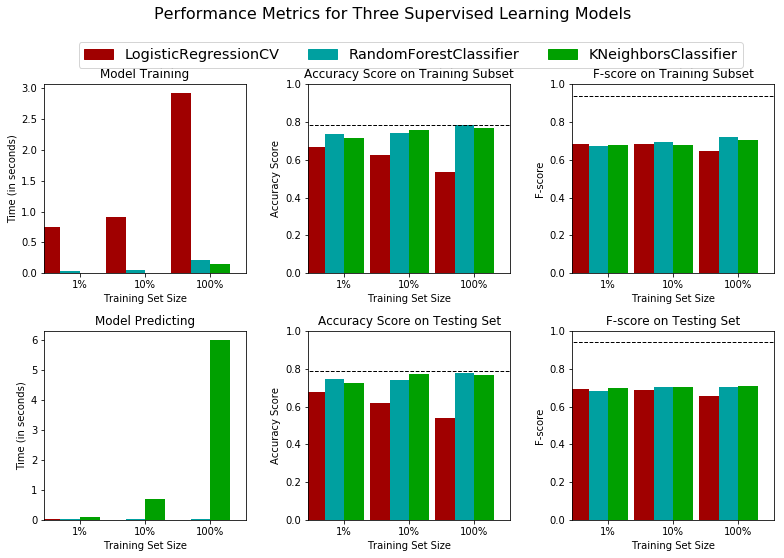

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
# TODO: Initialize the three models
clf_A =  linear_model.LogisticRegressionCV(class_weight='balanced',multi_class='multinomial',solver='lbfgs',random_state=40)
clf_B = KNeighborsClassifier()
clf_C = RandomForestClassifier(random_state=40)
#clf_D = RandomForestClassifier(random_state = 40)

samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1,samples_10,samples_100]):
        results[clf_name][i]=train_predict(clf, samples, X_train, y_train, X_test, y_test)

vs.evaluate(results, accuracy, fscore)

####  Looking at the graph I can say Randomforest is performing well on testing set. It outperfrom other two model in all the sample cases. With High accuracy and high FScore I choose Randomforest as best model. Also if you see at training time requried out of three models KNeighborsClassifier take highest time so training time wise also Randomforest is performing better.

### Implementation: Model Tuning
##### Fine tune the chosen model. Use grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values.

In [158]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier(n_estimators=200,max_depth=15,min_samples_split=117,min_samples_leaf=3,max_leaf_nodes=52)

k = np.arange(20)+1
parameters = {
              "max_leaf_nodes": np.arange(2,60,5),
              #"n_estimators": np.arange(2, 300, 2),
              #"max_depth": np.arange(1, 28, 1),
              #"min_samples_split": np.arange(2,150,1),
              #"min_samples_leaf": np.arange(1,60,1),
              #"max_leaf_nodes": np.arange(2,60,1),
              #"min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}
             }

#  Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5,average='weighted')

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,cv=10)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = clf.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores

print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='weighted'))


Optimized Model
------
Final accuracy score on the testing data: 0.7870
Final F-score on the testing data: 0.7107


##### After tunning hyper parament I have found that tunning does not add much accuracy or improve Fscore. I believe as we dont have enough data to tune on we are not seeing improvement in scores

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.2306         |     0.7774        |   0.7875        |
| F-score        |      0.2716         |     0.7206        |   0.7107        |


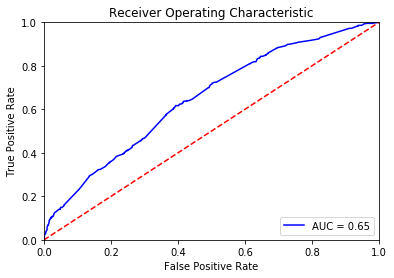

In [162]:
probabilities = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probabilities)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Finding Important features: 

Feature ranking:
1. feature Phone to Name_Match (0.185677)
2. feature Phone to Name_No match (0.146302)
3. feature Phone Line Type_Mobile (0.077793)
4. feature Address Is Active_Not in Database (0.047420)
5. feature Address Is Commercial_Not in Database (0.046964)
6. feature Phone Line Type_Fixed VOIP (0.042366)
7. feature Address Type_Not in Database (0.040750)
8. feature Address to Name_Not in Database (0.033174)
9. feature Phone Line Type_Landline (0.031588)
10. feature Phone Is Prepaid_FALSE (0.030749)
11. feature Address to Name_No match (0.026052)
12. feature Phone Is Commercial_TRUE (0.025486)
13. feature Phone Is Commercial_FALSE (0.023232)
14. feature Phone Is Prepaid_Unknown (0.023224)
15. feature Phone Line Type_Non-fixed VOIP (0.022676)
16. feature Address to Name_Match (0.022633)
17. feature Address Type_Multi unit (0.021950)
18. feature Phone to Name_No name found (0.017628)
19. feature Address Type_PO box (0.016194)
20. feature Address Is Commercial_TRUE (0.015679)
21. f

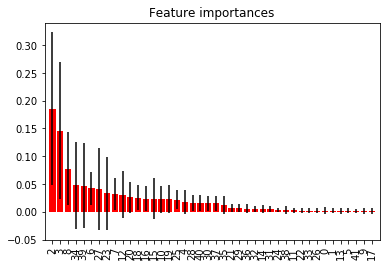

In [161]:

importances = best_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
probabilities = best_clf.predict_proba(X_test)[:, 1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xticks(rotation='vertical')
plt.show()

##### Below are important features which helps decide if call deposition is going to be 1 or not.
##### 1. feature Phone to Name_Match (0.185677)
##### 2. feature Phone to Name_No match (0.146302)
##### 3. feature Phone Line Type_Mobile (0.077793)
##### 4. feature Address Is Active_Not in Database (0.047420)
##### 5. feature Address Is Commercial_Not in Database (0.046964)
##### 6. feature Phone Line Type_Fixed VOIP (0.042366)
##### 7. feature Address Type_Not in Database (0.040750)
##### 8. feature Address to Name_Not in Database (0.033174)
##### 9. feature Phone Line Type_Landline (0.031588)
##### 10. feature Phone Is Prepaid_FALSE (0.030749)


##### So I belive we have found important features which decide if call deposition is going to be 1 or not. But the data is not sufficent to make predications. We need more data to relia on model prediction. 